<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/Regression_Logistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Prediction des resultats d'examens d'attente en fonction de l'age et de la note physique

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/MasterClass_DataScience_Machine_Learning_Notebooks_et_Datasets/11-Modèles-de-Régression-Logistique/Datasets/hearing_test.csv")

In [4]:
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

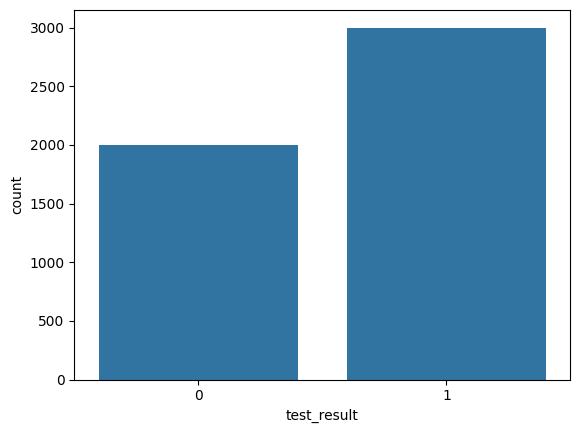

In [7]:
sns.countplot(x='test_result', data=df)

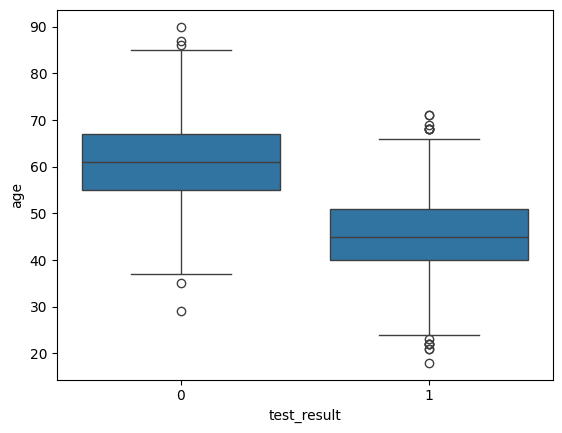

In [8]:
sns.boxplot(x='test_result', y='age', data=df);

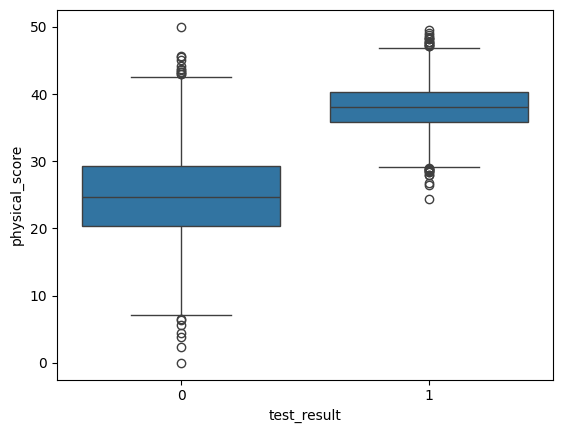

In [9]:
sns.boxplot(x='test_result', y='physical_score', data=df);

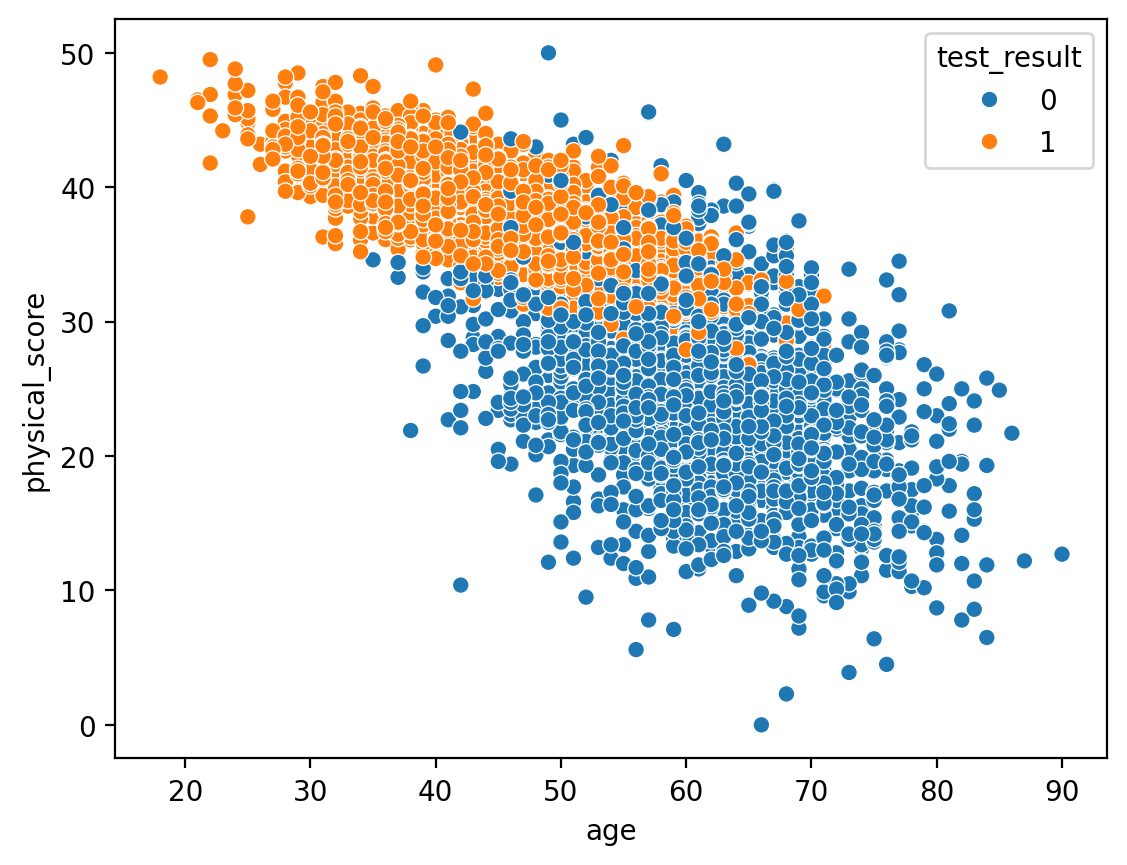

In [10]:
# visualisation  les nuages de pts
fig = plt.figure(dpi=200)
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result');

<Figure size 1280x960 with 0 Axes>

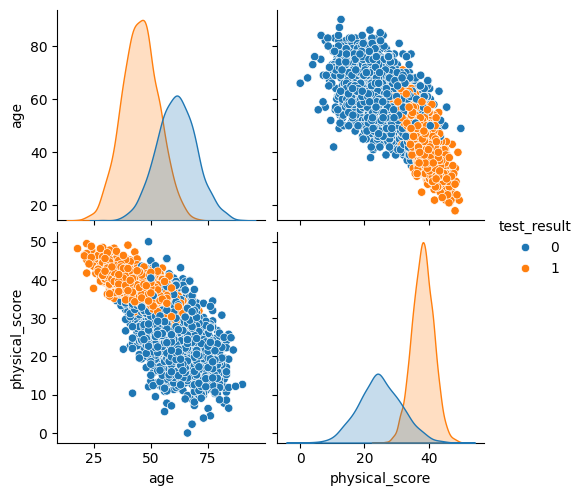

In [11]:
# visualisation  les nuages de pts
fig = plt.figure(dpi=200)
sns.pairplot( data=df, hue='test_result');

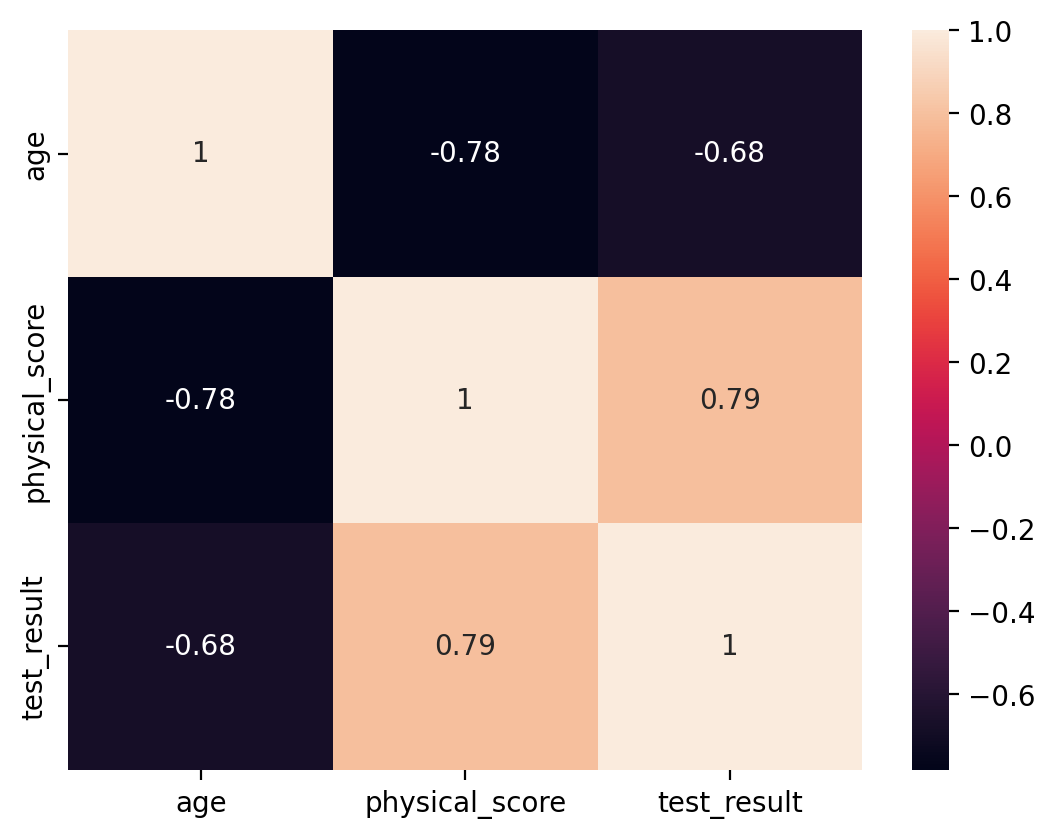

In [12]:
# visualisation  avec heatmap
fig = plt.figure(dpi=200)
sns.heatmap(df.corr(), annot=True);

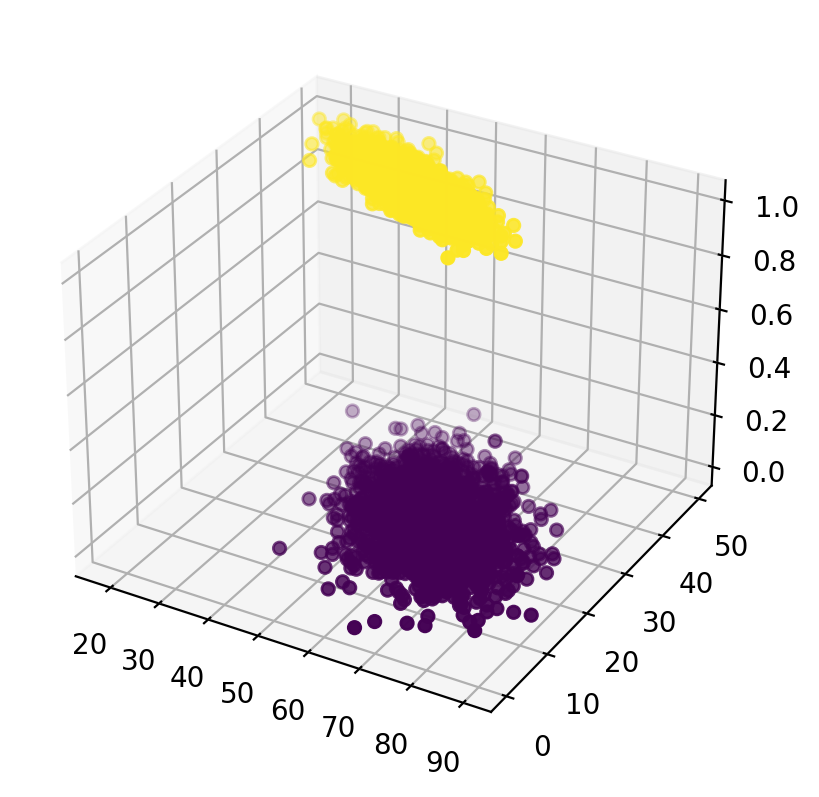

In [13]:
# visualisation 3D
# visualisation  les nuages de pts
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d');
ax.scatter(df['age'], df['physical_score'], df['test_result'], c= df['test_result']);

In [14]:
# separation  de nos futures
X= df.drop('test_result', axis=1)
y = df['test_result']

In [15]:
# mise a  l'echelle
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X_train  = scaler.fit_transform(X_train)

In [20]:
scaled_X_test = scaler.transform(X_test)

In [21]:
# model de regression logistique
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression()

In [23]:
model.fit(scaled_X_train, y_train) # entrainement u model

LogisticRegression()

In [24]:
model.coef_

array([[-0.91653034,  3.4506941 ]])

In [25]:
y_pred = model.predict(scaled_X_test)

In [26]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [27]:
# probabilite d'appartenir a chq class
model.coef_

array([[-0.91653034,  3.4506941 ]])

In [28]:
#

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
y_pred = model.predict(scaled_X_test)

In [30]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [31]:
# Calcul de l'accuracy ou exactitude
accuracy_score(y_test, y_pred)

0.9206666666666666

In [32]:
# confusion de matrix
confusion_matrix(y_test, y_pred)

array([[515,  82],
       [ 37, 866]])

In [33]:
#
from sklearn.metrics import ConfusionMatrixDisplay

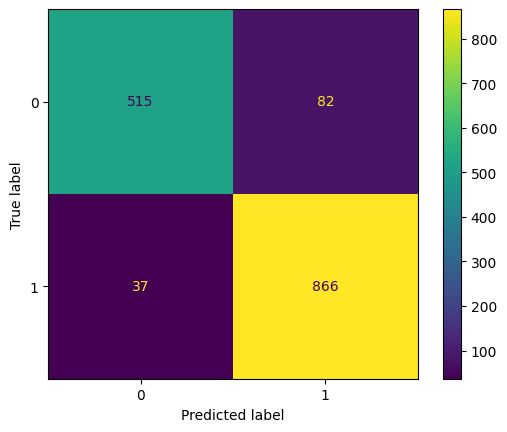

In [34]:
ConfusionMatrixDisplay.from_estimator(model, scaled_X_test, y_test)